<a href="https://colab.research.google.com/github/Sitraka17/Viz/blob/main/MAPSfromDataisBeautifullReddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Just Testing

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm

In [2]:
!wget https://zenodo.org/record/4759091/files/GF_FESOM2_testdata.tar.gz

--2021-10-24 17:19:36--  https://zenodo.org/record/4759091/files/GF_FESOM2_testdata.tar.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8963408 (8.5M) [application/octet-stream]
Saving to: ‘GF_FESOM2_testdata.tar.gz’

GF_FESOM2_testdata. 100%[===================>]   8.55M  8.83MB/s    in 1.0s    

2021-10-24 17:19:38 (8.83 MB/s) - ‘GF_FESOM2_testdata.tar.gz’ saved [8963408/8963408]



In [3]:
!gunzip GF_FESOM2_testdata.tar.gz

In [4]:
!tar -xvf GF_FESOM2_testdata.tar


GF_FESOM2_testdata/
GF_FESOM2_testdata/v_surf.nc
GF_FESOM2_testdata/u_surf.nc
GF_FESOM2_testdata/sst.nc


In [5]:
sst = xr.open_dataset('./GF_FESOM2_testdata/sst.nc')
u = xr.open_dataset('./GF_FESOM2_testdata/u_surf.nc')
v = xr.open_dataset('./GF_FESOM2_testdata/v_surf.nc')

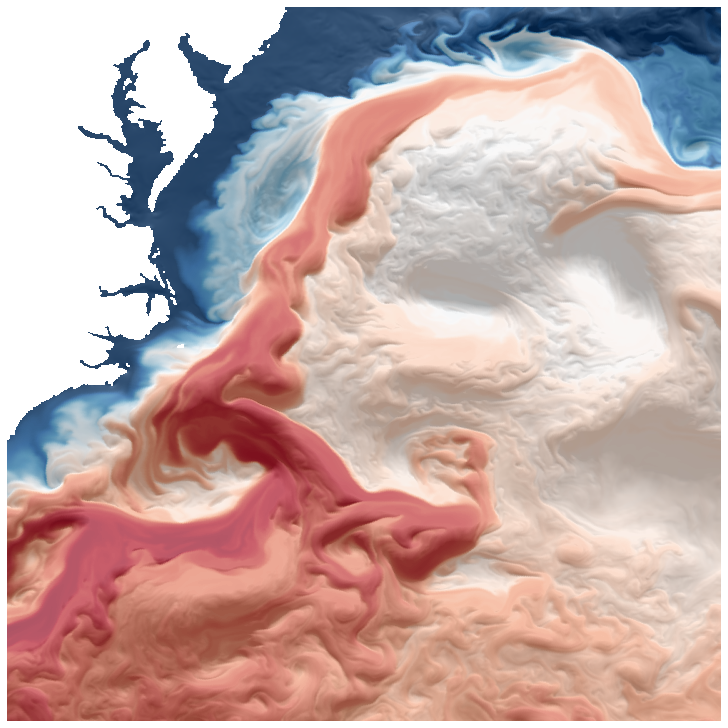

In [6]:
fig, ax = plt.subplots(
            1,
            1,
            constrained_layout=True,
            figsize=(10,10),
        )
ax.imshow(np.flipud(sst.sst.values), cmap=cm.RdBu_r,  vmin=12, vmax=24)
ax.imshow(np.flipud(u.u_surf.values), alpha=0.3, cmap=cm.gray, vmin=-.3, vmax=0.3)
ax.axis('off');
# plt.savefig('./out_figure.png', dpi=300)

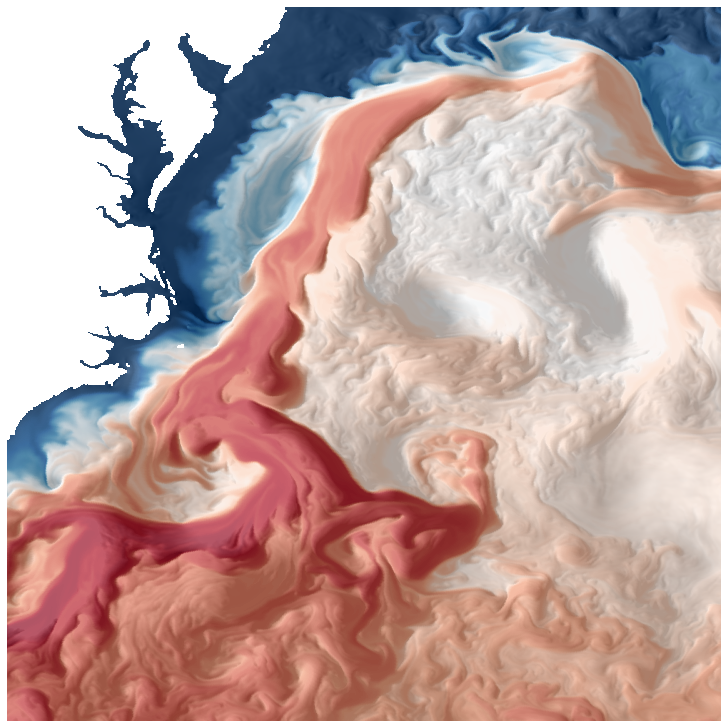

In [7]:
fig, ax = plt.subplots(
            1,
            1,
            constrained_layout=True,
            figsize=(10,10),
        )
ax.imshow(np.flipud(sst.sst.values), cmap=cm.RdBu_r,  vmin=12, vmax=24)
ax.imshow(np.flipud(v.v_surf.values), alpha=0.3, cmap=cm.gray, vmin=-.3, vmax=0.3)
ax.axis('off');

In [8]:
direct = np.rad2deg(np.arctan2(v.v_surf.values, u.u_surf.values))
speed_rot = np.hypot(u.u_surf.values, v.v_surf.values)

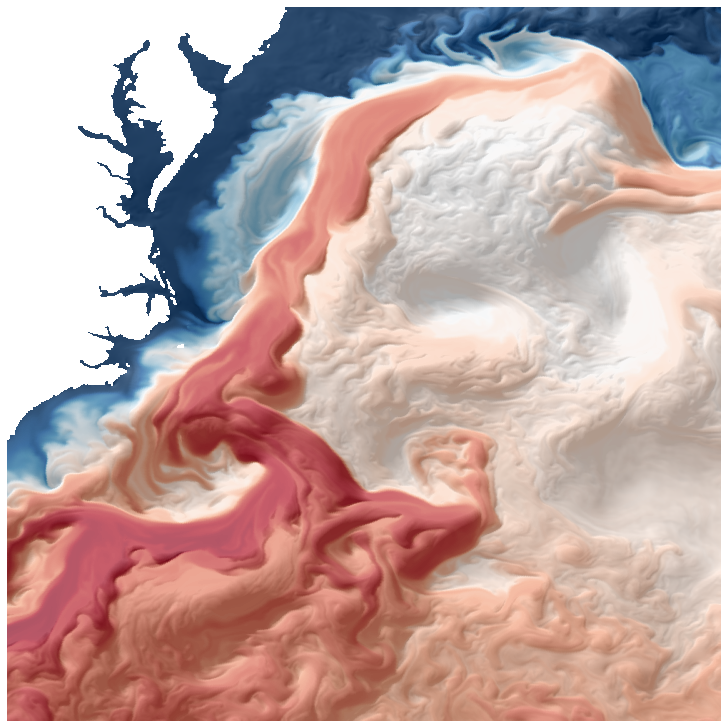

In [9]:

myangle = 45
U = speed_rot * np.cos(np.deg2rad(myangle - direct))
# V = speed_rot * np.sin(np.deg2rad(myangle - direct))
fig, ax = plt.subplots(
            1,
            1,
            constrained_layout=True,
            figsize=(10,10),
        )
ax.imshow(np.flipud(sst.sst.values), cmap=cm.RdBu_r,  vmin=12, vmax=24)
ax.imshow(np.flipud(U), alpha=0.3, cmap=cm.gray, vmin=-.3, vmax=0.3)
ax.axis('off');